# Conducción estacionaria

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluacion import Quizz
quizz = Quizz('DerivadasNumericas', 'Examen', 'local')

# Parámetros para el estilo de las gráficas
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams['axes.grid'] = False
plt.rcParams.update(params)

In [8]:
def buildMatrix(N, d):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    d: float Contenido de la diagonal.
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = d
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = d
    
    return A

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Definir lo siguiente:</font>**
```python
# Parámetros físicos: L, TA, TB, k, S, w = 2.5 * pi
L = ...
...

# Parámetros numéricos: N, h
N = ...
...

# Coordenadas de la malla
x = ...
```
---

In [17]:
### BEGIN SOLUTION
# Parámetros físicos: L, TA, TB, k, S, w = 2.5 * pi
L = 1.0
TA = 1.0
TB = 1.0
k = 1.0
S = 0.0
w = 2.5 * np.pi

# Parámetros numéricos: N, h
N = 39
h = L / (N+1)

# Coordenadas de la malla
x = np.linspace(0, L, N+2)
### END SOLUTION

In [15]:
quizz.verifica('1','1',np.round(x,3))

¡Tu resultado es correcto!


---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Definir lo siguiente:</font>**
```python
# Arreglo para almacenar la solución
T = ...

# Los valores en los extremos son conocidos debido a las cond. Dirichlet
T[0] = ...
T[-1] = ...

# Lado derecho del sistema
b = ...

# Aplicacion de las condiciones de frontera Dirichlet
b[0] = ...
b[-1] = ...

# Construcción de la matriz
w = ...
A = ...

```
---

In [26]:
### BEGIN SOLUTION
# Arreglo para almacenar la solución
T = np.zeros(N+2)

# Los valores en los extremos son conocidos debido a las cond. Dirichlet
T[ 0] = TA
T[-1] = TB

# Lado derecho del sistema
b = np.zeros(N) 

# Aplicacion de las condiciones de frontera Dirichlet
b[ 0] += TA   
b[-1] += TB 

# Construcción de la matriz
w = 2.5 * np.pi
A = buildMatrix(N, 2-(w * h)**2) # Matriz del sistema
### END SOLUTION

In [29]:
quizz.verifica('1','2',np.round(A.diagonal(),8))

¡Tu resultado es correcto!


In [53]:
# Solución del sistema lineal
T[1:-1] = np.linalg.solve(A,b)

In [40]:
quizz.verifica('1','3',np.round(T,8))

¡Tu resultado es correcto!


---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Agregar una función para calcular la solución exacta:</font>**
```python
def solExact(x, w):
    ...

```
---

In [41]:
### BEGIN SOLUTION
# Agrega la función: def solExact(x, w):
def solExact(x,w):
    return ((1.0 - 1.0 * np.cos(w))/np.sin(w)) * np.sin(w * x) + np.cos(w * x)
### END SOLUTION

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Agregar el cálculo del error:</font>**
```python
Error =     ...
```
---

In [50]:
# Agrega el cálculo del error: 

### BEGIN SOLUTION
# Agrega el cálculo del error: 
Error = np.linalg.norm(solExact(x,w) - T, 2)
### END SOLUTION

print(Error)

0.04614723768420828


In [51]:
quizz.verifica('1','4',np.round(Error,8))

¡Tu resultado es correcto!


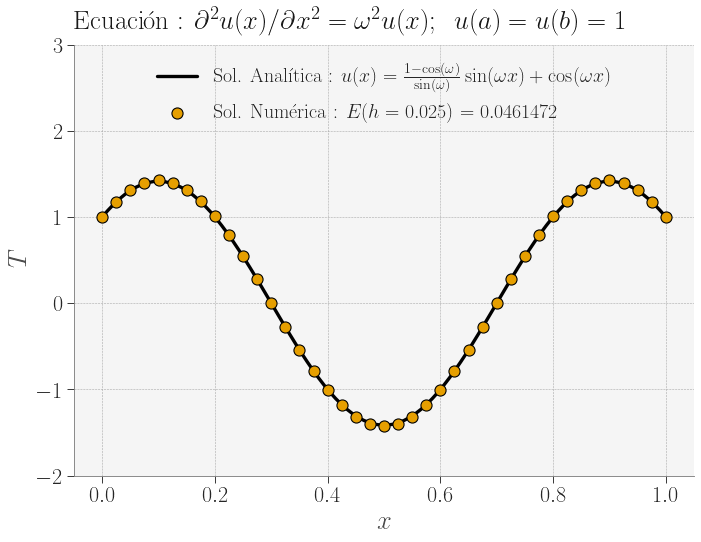

In [52]:
#
# El código siguiente realiza las gráficas usando lo calculado en las celdas anteriores
#
titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'

plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol,w),'-', label=exacta)
plt.scatter(x, T, fc = 'C1', ec='k', zorder= 10, label=numerica)
plt.title(titulo)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.ylim(-2.0,3.0)
plt.legend(loc='upper center', fontsize=18)
plt.grid()
plt.savefig('calibracion1.pdf')
plt.show()